In [7]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
from rydbperc import ryperc

In [16]:
N_points = 10000
shape = [1,1,10]
clu = ryperc.cluster3D(N_points, shape, distribution="gaussian", MOT_radius=10)

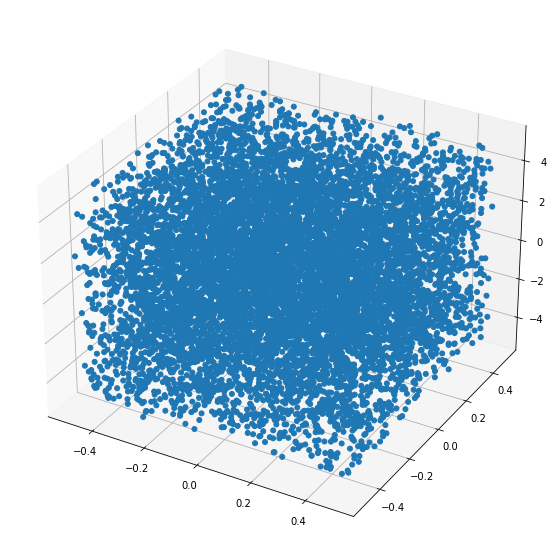

In [17]:
clu.show()